# 🚀 Análisis Exploratorio - Adopción Global de Herramientas de IA

## 📋 Objetivo
Analizar los patrones de adopción de herramientas de IA across diferentes industrias y regiones para identificar tendencias y oportunidades de crecimiento.

## 🎯 Metodología
- Análisis descriptivo y exploratorio
- Visualización de datos
- Identificación de patrones y correlaciones
- Storytelling con datos

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("✅ Librerías importadas y configuradas correctamente")

✅ Librerías importadas y configuradas correctamente


In [5]:
# Cargar dataset limpio
df = pd.read_csv('../data/ai_adoption_cleaned.csv')

print("📊 INFORMACIÓN DEL DATASET")
print("=" * 50)
print(f"📈 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"🏷️  Columnas: {list(df.columns)}")

# Información general
print("\n🔍 INFORMACIÓN GENERAL:")
df.info()

📊 INFORMACIÓN DEL DATASET
📈 Dimensiones: 145000 filas × 9 columnas
🏷️  Columnas: ['country', 'industry', 'ai_tool', 'adoption_rate', 'daily_active_users', 'year', 'user_feedback', 'age_group', 'company_size']

🔍 INFORMACIÓN GENERAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145000 entries, 0 to 144999
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   country             145000 non-null  object 
 1   industry            145000 non-null  object 
 2   ai_tool             145000 non-null  object 
 3   adoption_rate       145000 non-null  float64
 4   daily_active_users  145000 non-null  int64  
 5   year                145000 non-null  int64  
 6   user_feedback       145000 non-null  object 
 7   age_group           145000 non-null  object 
 8   company_size        145000 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 10.0+ MB


📝 VARIABLES CATEGÓRICAS (6):
  - country: 10 valores únicos
    ✅ ÚTIL para análisis
  - industry: 8 valores únicos
    ✅ ÚTIL para análisis
  - ai_tool: 5 valores únicos
    ✅ ÚTIL para análisis
  - user_feedback: 145000 valores únicos
    ⚠️ DEMASIADOS valores únicos - No útil para gráficos
  - age_group: 5 valores únicos
    ✅ ÚTIL para análisis
  - company_size: 3 valores únicos
    ✅ ÚTIL para análisis

🎯 COLUMNAS ÚTILES PARA ANÁLISIS: ['country', 'industry', 'ai_tool', 'age_group', 'company_size']

📊 DISTRIBUCIÓN DE COUNTRY:


country
Australia      14723
France         14676
China          14562
South Korea    14540
India          14531
UK             14476
Germany        14405
Brazil         14381
Canada         14354
USA            14352
Name: count, dtype: int64

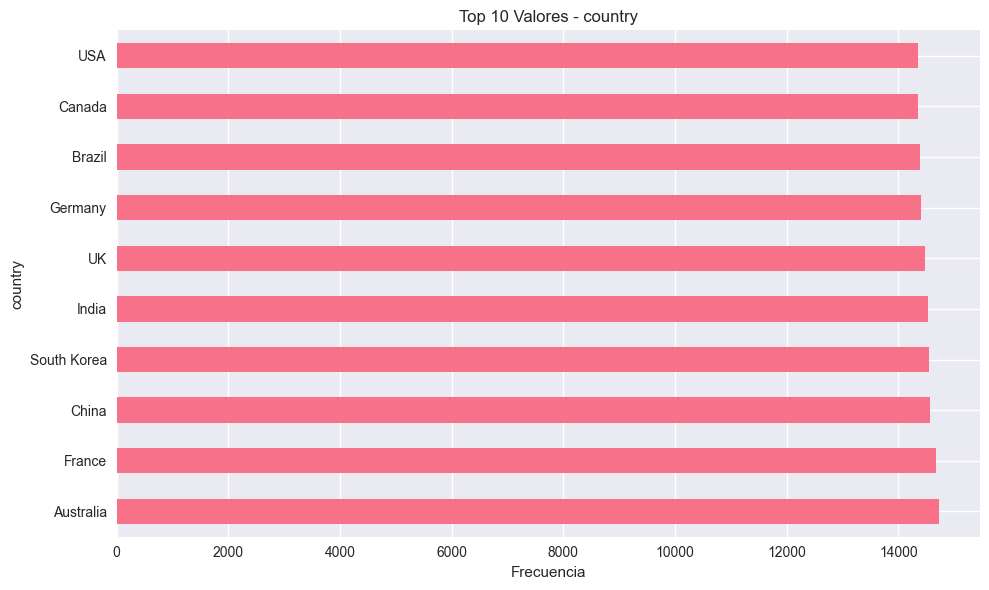


📊 DISTRIBUCIÓN DE INDUSTRY:


industry
Manufacturing     18267
Education         18200
Transportation    18158
Technology        18134
Finance           18124
Healthcare        18118
Retail            18053
Agriculture       17946
Name: count, dtype: int64

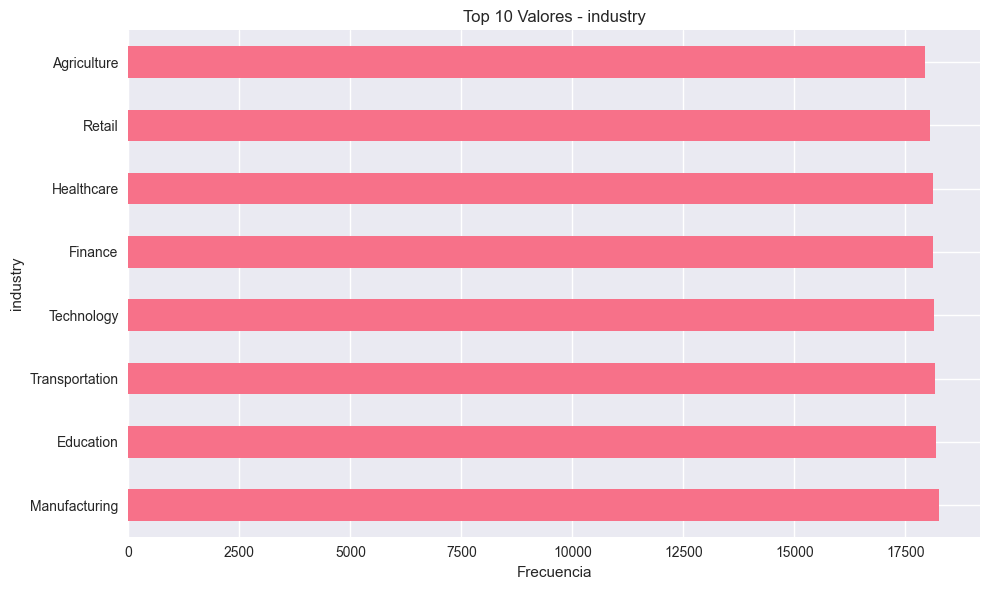


📊 DISTRIBUCIÓN DE AI_TOOL:


ai_tool
ChatGPT             58045
Midjourney          43324
Stable Diffusion    21826
Bard                14519
Claude               7286
Name: count, dtype: int64

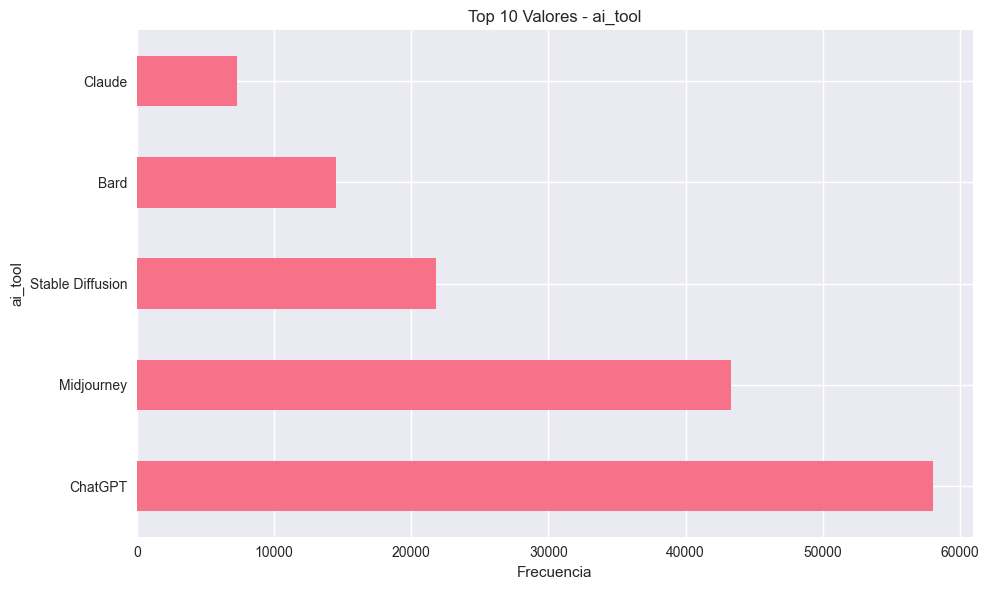


📊 DISTRIBUCIÓN DE AGE_GROUP:


age_group
55+      29424
25-34    29061
35-44    28873
45-54    28833
18-24    28809
Name: count, dtype: int64

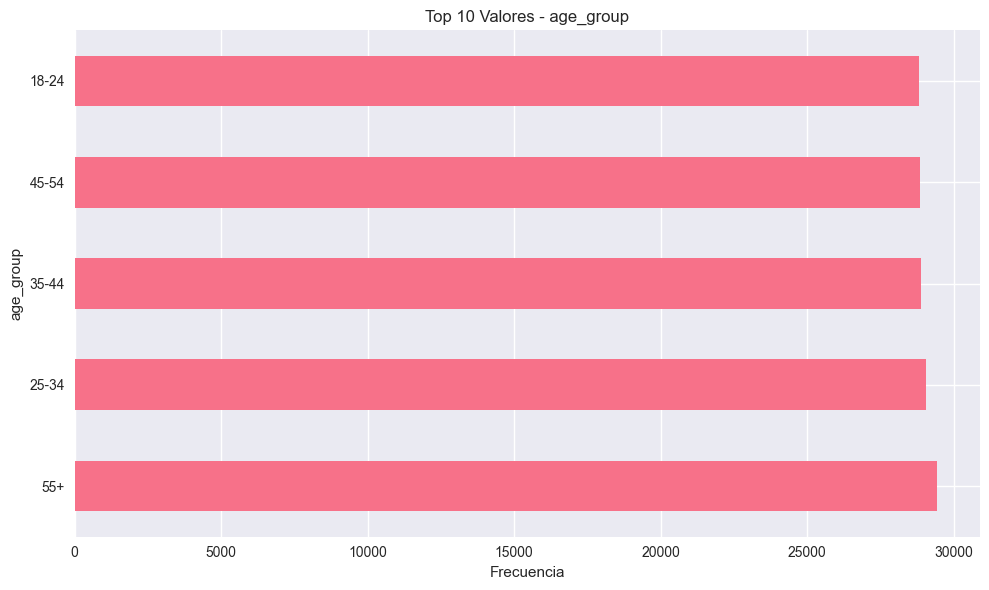


📊 DISTRIBUCIÓN DE COMPANY_SIZE:


company_size
Startup       48601
Enterprise    48279
SME           48120
Name: count, dtype: int64

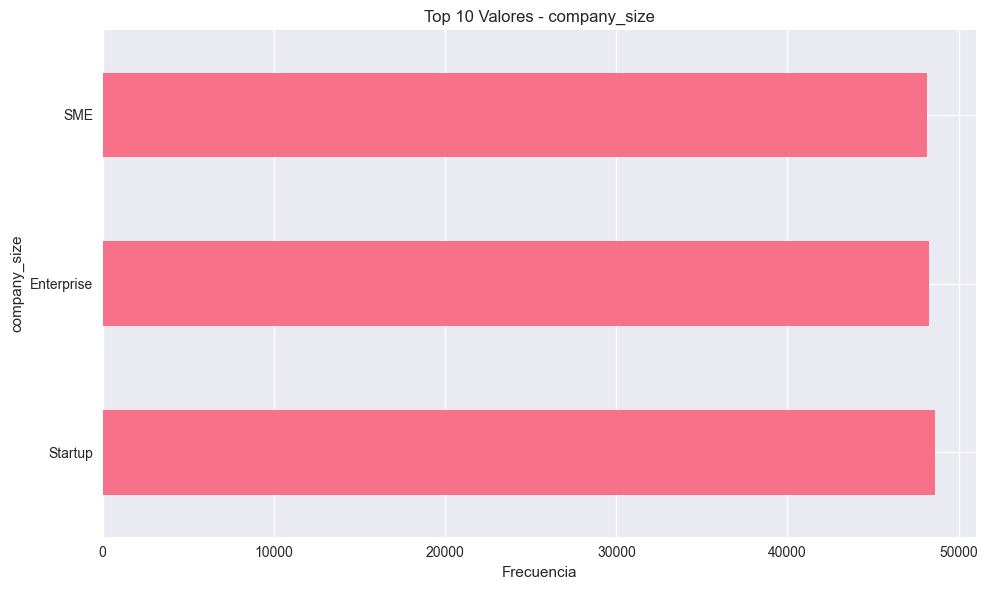

In [9]:
# Identificar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"📝 VARIABLES CATEGÓRICAS ({len(categorical_cols)}):")

# FILTRAR columnas con muchos valores únicos
useful_categorical_cols = []
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"  - {col}: {unique_count} valores únicos")
    
    # Solo incluir columnas con menos de 50 valores únicos para análisis
    if unique_count <= 50:
        useful_categorical_cols.append(col)
        print(f"    ✅ ÚTIL para análisis")
    else:
        print(f"    ⚠️ DEMASIADOS valores únicos - No útil para gráficos")

print(f"\n🎯 COLUMNAS ÚTILES PARA ANÁLISIS: {useful_categorical_cols}")

# Análisis detallado SOLO de columnas útiles
for col in useful_categorical_cols:
    print(f"\n📊 DISTRIBUCIÓN DE {col.upper()}:")
    value_counts = df[col].value_counts()
    display(value_counts.head(10))
    
    # Gráfico de top categorías
    plt.figure(figsize=(10, 6))
    value_counts.head(10).plot(kind='barh')
    plt.title(f'Top 10 Valores - {col}')
    plt.xlabel('Frecuencia')
    plt.tight_layout()
    plt.show()

🔢 VARIABLES NUMÉRICAS (3): ['adoption_rate', 'daily_active_users', 'year']

📅 ANÁLISIS ESPECIAL PARA 'year':
Valores únicos: [np.int64(2023), np.int64(2024)]


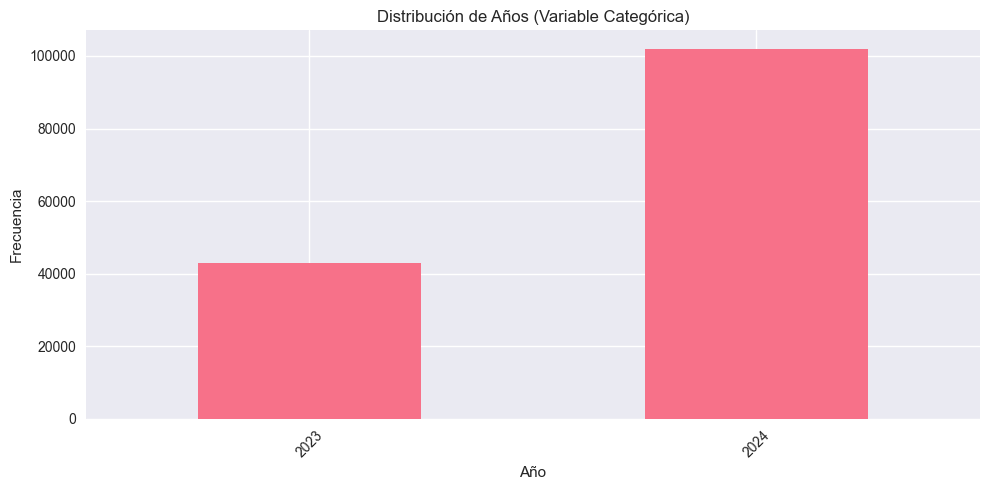


📊 VARIABLES CONTINUAS PARA ANÁLISIS: ['adoption_rate', 'daily_active_users']


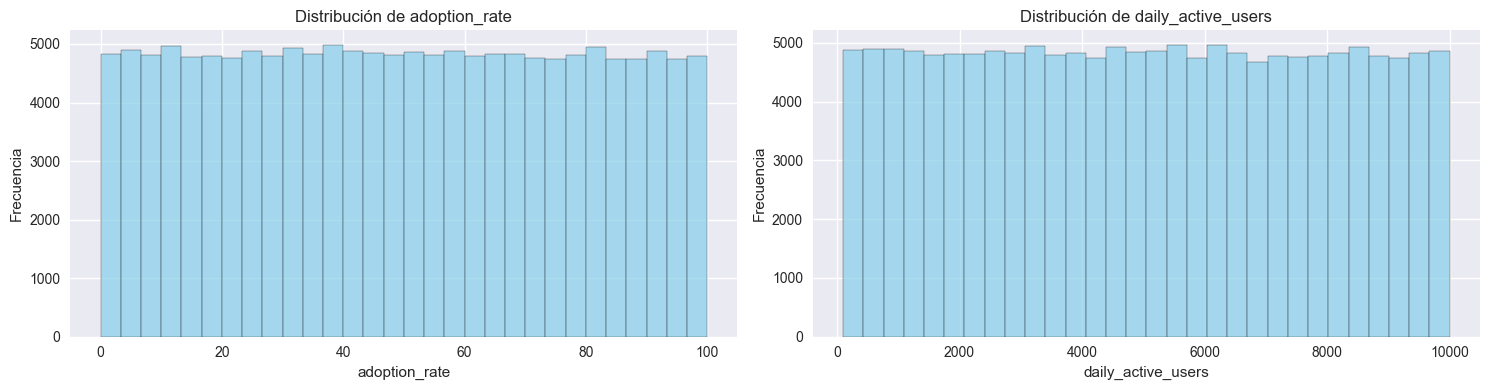


📈 ESTADÍSTICAS DESCRIPTIVAS:


,adoption_rate,daily_active_users,year
count,145000.000000,145000.000000,145000.000000
mean,49.873025,5039.302683,2023.703117
std,28.842523,2858.124918,0.456886
min,0.000000,100.000000,2023.000000
25%,24.930000,2566.000000,2023.000000
50%,49.760000,5036.000000,2024.000000
75%,74.840000,7515.000000,2024.000000
max,100.000000,9999.000000,2024.000000


In [11]:
# Identificar variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"🔢 VARIABLES NUMÉRICAS ({len(numeric_cols)}): {list(numeric_cols)}")

# Análisis especial para 'year' - es categórica, no continua
if 'year' in numeric_cols:
    print(f"\n📅 ANÁLISIS ESPECIAL PARA 'year':")
    print(f"Valores únicos: {sorted(df['year'].unique())}")
    
    plt.figure(figsize=(10, 5))
    df['year'].value_counts().sort_index().plot(kind='bar')
    plt.title('Distribución de Años (Variable Categórica)')
    plt.xlabel('Año')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Distribución de variables numéricas CONTINUAS (excluyendo year)
continuous_cols = [col for col in numeric_cols if col != 'year']
print(f"\n📊 VARIABLES CONTINUAS PARA ANÁLISIS: {continuous_cols}")

if len(continuous_cols) > 0:
    n_cols = min(2, len(continuous_cols))
    n_rows = (len(continuous_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    
    # Aplanar el array de axes si hay múltiples filas/columnas
    if n_rows > 1 or n_cols > 1:
        axes = axes.ravel()
    else:
        axes = [axes]
    
    for i, col in enumerate(continuous_cols):
        if i < len(axes):
            df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribución de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')
    
    # Ocultar ejes vacíos
    for i in range(len(continuous_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Estadísticas descriptivas
print("\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
display(df[numeric_cols].describe())

🔥 MATRIZ DE CORRELACIONES


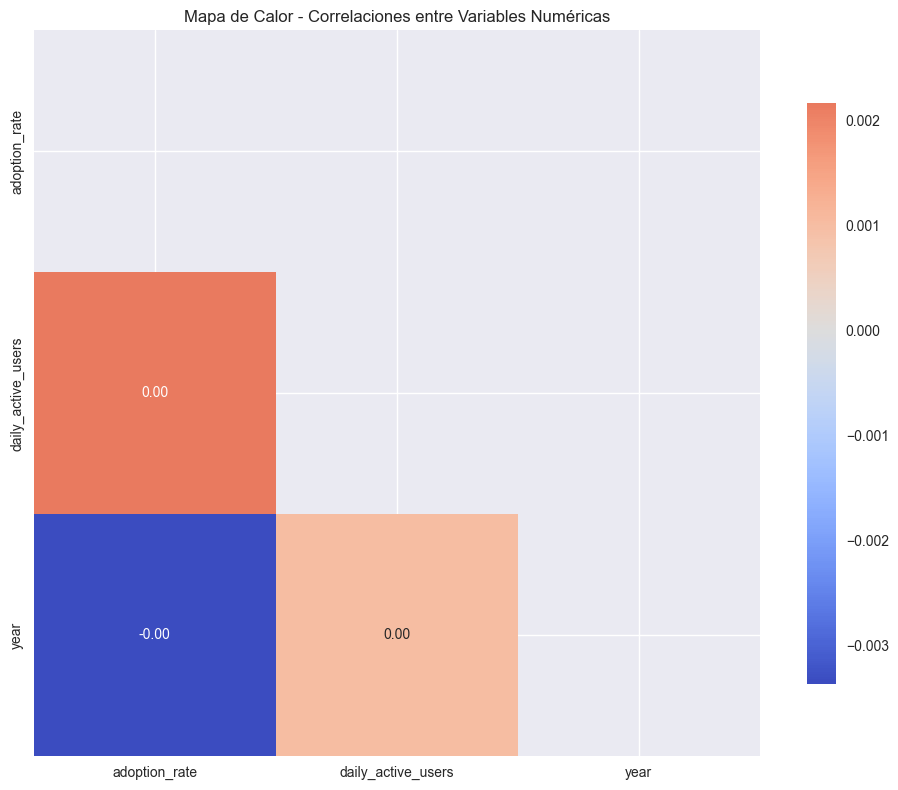

In [8]:
# Matriz de correlación
if len(numeric_cols) > 1:
    print("🔥 MATRIZ DE CORRELACIONES")
    
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numeric_cols].corr()
    
    # Crear máscara para el triángulo superior
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8})
    plt.title('Mapa de Calor - Correlaciones entre Variables Numéricas')
    plt.tight_layout()
    plt.show()

🏭 ANÁLISIS DETALLADO POR INDUSTRIA
📈 ADOPCIÓN POR INDUSTRIA (Ordenado de mayor a menor):


,adoption_rate_mean,adoption_rate_median,adoption_rate_std,adoption_rate_count,daily_active_users_mean
industry,,,,,
Agriculture,50.329,50.445,28.781,17946,5047.567
Technology,50.017,49.770,28.986,18134,5049.478
Finance,49.960,50.095,28.827,18124,5038.861
Healthcare,49.869,49.765,28.852,18118,5040.218
Transportation,49.843,49.860,28.901,18158,5018.638
Education,49.789,49.800,28.834,18200,5028.683
Retail,49.607,49.210,28.706,18053,5048.515
Manufacturing,49.576,49.380,28.850,18267,5042.630


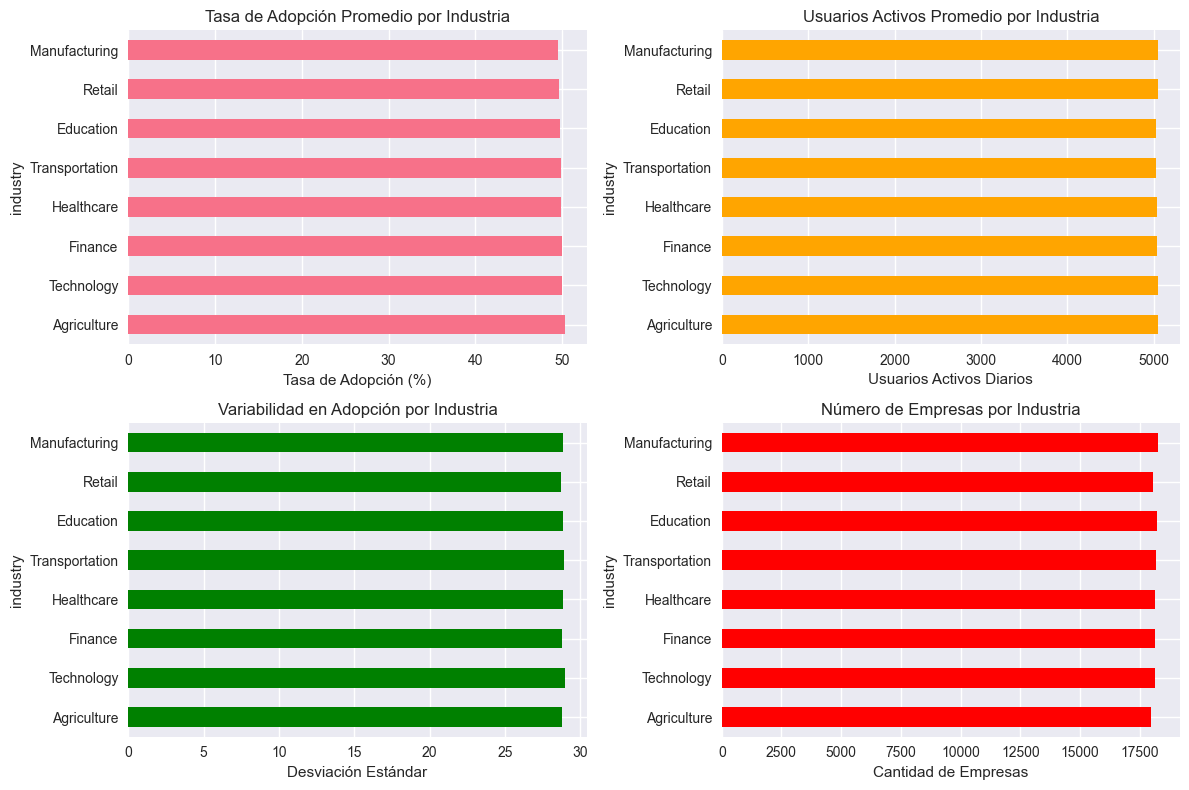

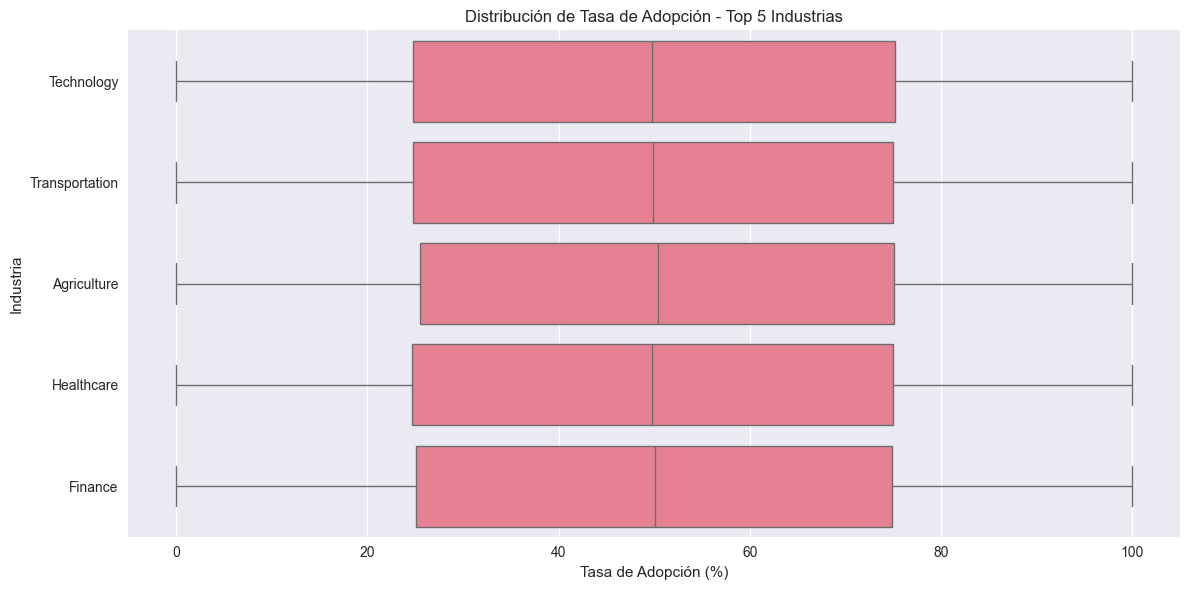

In [21]:
# ANÁLISIS POR INDUSTRIA
print("🏭 ANÁLISIS DETALLADO POR INDUSTRIA")
print("=" * 50)

if 'industry' in df.columns:
    # Análisis de adopción por industria
    industry_adoption = df.groupby('industry').agg({
        'adoption_rate': ['mean', 'median', 'std', 'count'],
        'daily_active_users': 'mean'
    }).round(3)
    
    # Aplanar columnas multi-index
    industry_adoption.columns = ['_'.join(col).strip() for col in industry_adoption.columns.values]
    industry_adoption = industry_adoption.sort_values('adoption_rate_mean', ascending=False)
    
    print("📈 ADOPCIÓN POR INDUSTRIA (Ordenado de mayor a menor):")
    display(industry_adoption)
    
    # Visualización 1: Top industrias por adopción
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    industry_adoption['adoption_rate_mean'].plot(kind='barh')
    plt.title('Tasa de Adopción Promedio por Industria')
    plt.xlabel('Tasa de Adopción (%)')
    
    plt.subplot(2, 2, 2)
    industry_adoption['daily_active_users_mean'].plot(kind='barh', color='orange')
    plt.title('Usuarios Activos Promedio por Industria')
    plt.xlabel('Usuarios Activos Diarios')
    
    plt.subplot(2, 2, 3)
    industry_adoption['adoption_rate_std'].plot(kind='barh', color='green')
    plt.title('Variabilidad en Adopción por Industria')
    plt.xlabel('Desviación Estándar')
    
    plt.subplot(2, 2, 4)
    industry_adoption['adoption_rate_count'].plot(kind='barh', color='red')
    plt.title('Número de Empresas por Industria')
    plt.xlabel('Cantidad de Empresas')
    
    plt.tight_layout()
    plt.show()
    
    # Visualización 2: Boxplot por industria (Top 5)
    top_5_industries = industry_adoption.head(5).index
    df_top_industries = df[df['industry'].isin(top_5_industries)]
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_top_industries, x='adoption_rate', y='industry')
    plt.title('Distribución de Tasa de Adopción - Top 5 Industrias')
    plt.xlabel('Tasa de Adopción (%)')
    plt.ylabel('Industria')
    plt.tight_layout()
    plt.show()
    
else:
    print("ℹ️ No hay columna 'industry' para análisis")

🌎 ANÁLISIS GEOGRÁFICO - POR PAÍS
📊 ADOPCIÓN POR PAÍS:


,adoption_rate_mean,company_count,daily_users_mean,most_common_industry
country,,,,
Germany,50.179,14405,5048.854,Agriculture
India,50.059,14531,5035.384,Finance
Australia,49.991,14723,5025.079,Manufacturing
Brazil,49.987,14381,5007.108,Technology
Canada,49.923,14354,5050.767,Healthcare
South Korea,49.887,14540,5046.940,Education
UK,49.789,14476,4998.819,Technology
France,49.786,14676,5065.466,Healthcare
China,49.625,14562,5072.479,Education


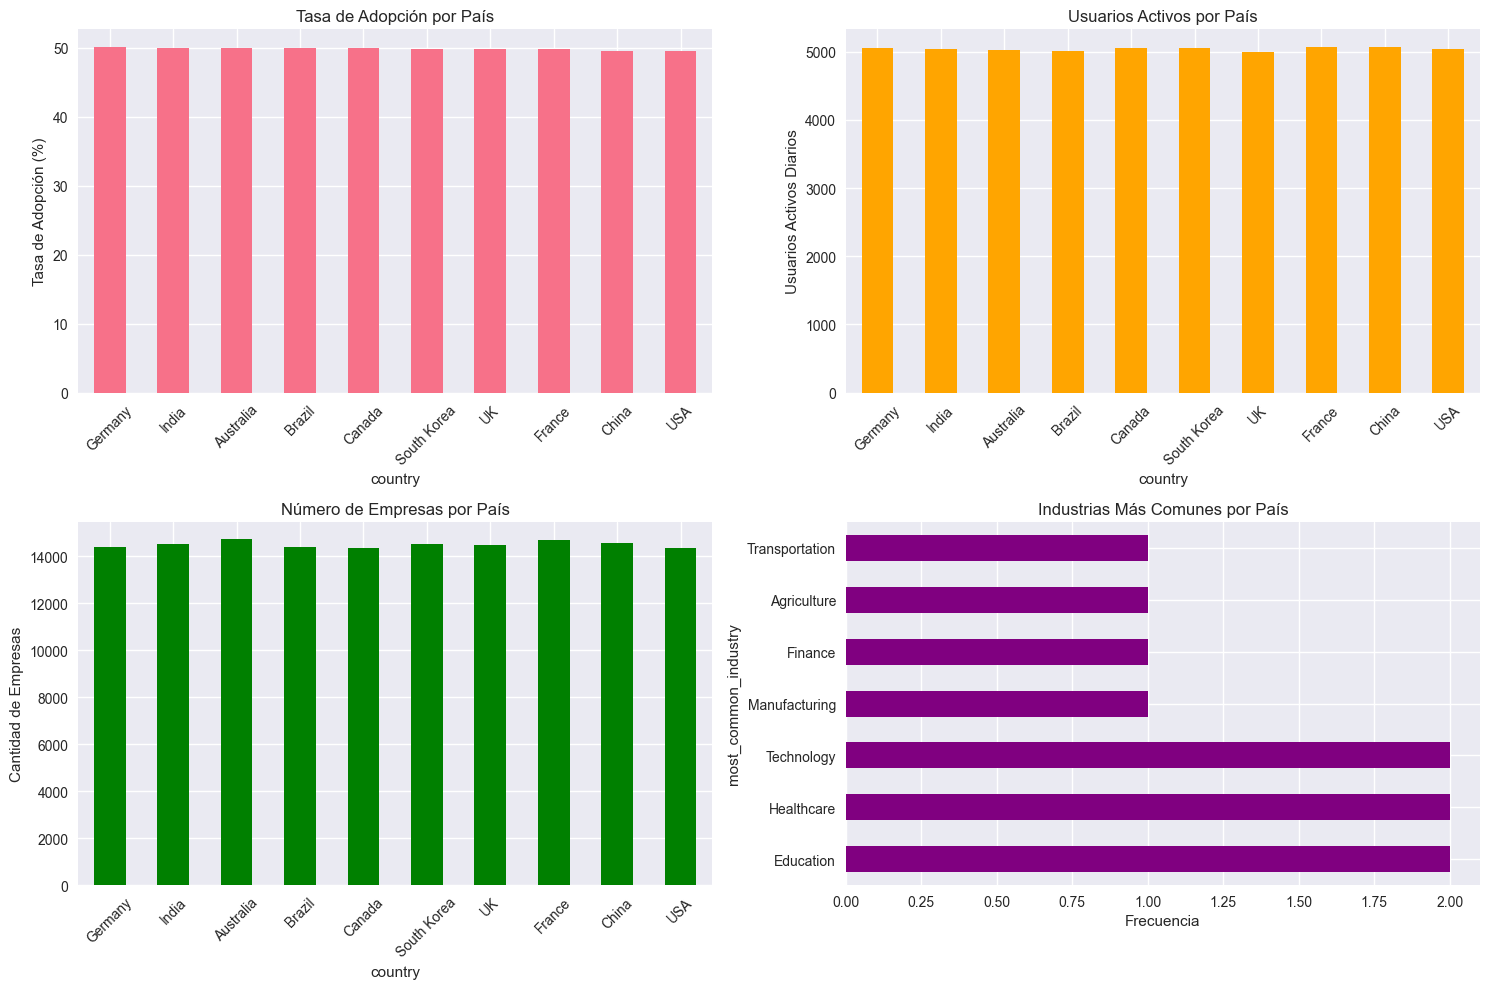

In [20]:
# ANÁLISIS POR PAÍS
print("🌎 ANÁLISIS GEOGRÁFICO - POR PAÍS")
print("=" * 50)

if 'country' in df.columns:
    # Análisis por país
    country_analysis = df.groupby('country').agg({
        'adoption_rate': ['mean', 'count'],
        'daily_active_users': 'mean',
        'industry': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'No Data'
    }).round(3)
    
    country_analysis.columns = ['adoption_rate_mean', 'company_count', 'daily_users_mean', 'most_common_industry']
    country_analysis = country_analysis.sort_values('adoption_rate_mean', ascending=False)
    
    print("📊 ADOPCIÓN POR PAÍS:")
    display(country_analysis)
    
    # Visualizaciones
    plt.figure(figsize=(15, 10))
    
    # Gráfico 1: Mapa de calor de adopción por país
    plt.subplot(2, 2, 1)
    country_analysis['adoption_rate_mean'].plot(kind='bar')
    plt.title('Tasa de Adopción por País')
    plt.xticks(rotation=45)
    plt.ylabel('Tasa de Adopción (%)')
    
    # Gráfico 2: Usuarios activos por país
    plt.subplot(2, 2, 2)
    country_analysis['daily_users_mean'].plot(kind='bar', color='orange')
    plt.title('Usuarios Activos por País')
    plt.xticks(rotation=45)
    plt.ylabel('Usuarios Activos Diarios')
    
    # Gráfico 3: Número de empresas por país
    plt.subplot(2, 2, 3)
    country_analysis['company_count'].plot(kind='bar', color='green')
    plt.title('Número de Empresas por País')
    plt.xticks(rotation=45)
    plt.ylabel('Cantidad de Empresas')
    
    # Gráfico 4: Industria más común por país
    plt.subplot(2, 2, 4)
    industry_by_country = country_analysis['most_common_industry'].value_counts().head(10)
    industry_by_country.plot(kind='barh', color='purple')
    plt.title('Industrias Más Comunes por País')
    plt.xlabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("ℹ️ No hay columna 'country' para análisis geográfico")

📅 ANÁLISIS TEMPORAL - TENDENCIAS POR AÑO
📈 TENDENCIAS ANUALES:


,avg_adoption_rate,avg_daily_users,company_count
year,,,
2023,50.022,5034.828,43048
2024,49.810,5041.192,101952


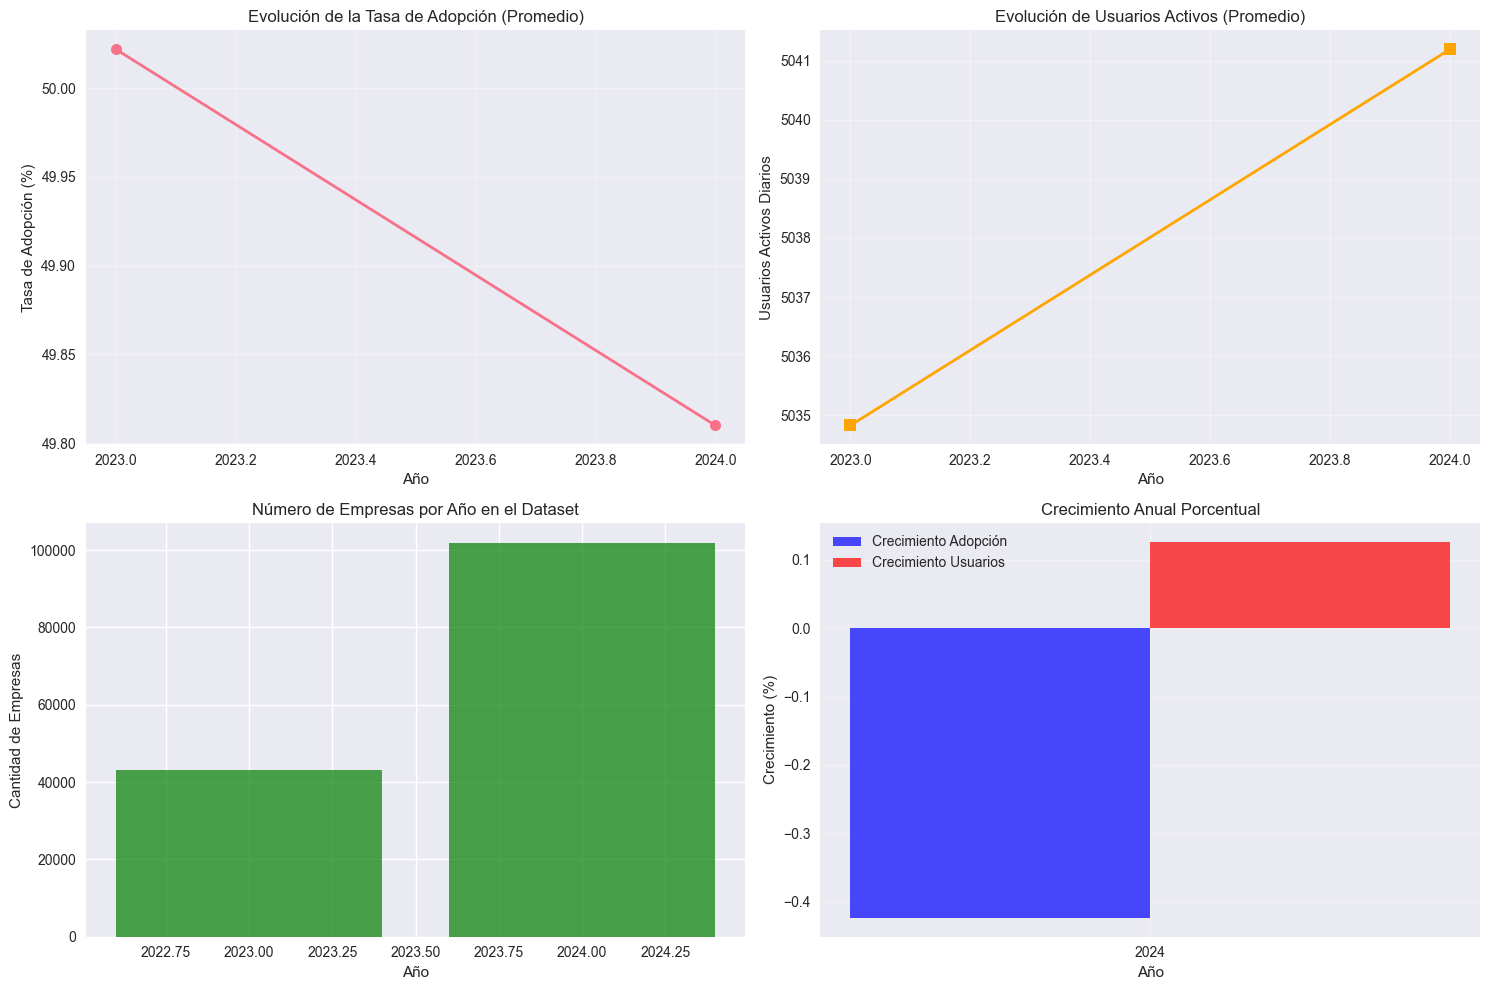

In [19]:
# ANÁLISIS TEMPORAL
print("📅 ANÁLISIS TEMPORAL - TENDENCIAS POR AÑO")
print("=" * 50)

if 'year' in df.columns:
    # Análisis por año
    yearly_trends = df.groupby('year').agg({
        'adoption_rate': 'mean',
        'daily_active_users': 'mean', 
        'industry': 'count'
    }).round(3)
    
    yearly_trends.columns = ['avg_adoption_rate', 'avg_daily_users', 'company_count']
    
    print("📈 TENDENCIAS ANUALES:")
    display(yearly_trends)
    
    # Visualización de tendencias
    plt.figure(figsize=(15, 10))
    
    # Tendencia de adopción
    plt.subplot(2, 2, 1)
    plt.plot(yearly_trends.index, yearly_trends['avg_adoption_rate'], marker='o', linewidth=2, markersize=8)
    plt.title('Evolución de la Tasa de Adopción (Promedio)')
    plt.xlabel('Año')
    plt.ylabel('Tasa de Adopción (%)')
    plt.grid(True, alpha=0.3)
    
    # Tendencia de usuarios activos
    plt.subplot(2, 2, 2)
    plt.plot(yearly_trends.index, yearly_trends['avg_daily_users'], marker='s', color='orange', linewidth=2, markersize=8)
    plt.title('Evolución de Usuarios Activos (Promedio)')
    plt.xlabel('Año')
    plt.ylabel('Usuarios Activos Diarios')
    plt.grid(True, alpha=0.3)
    
    # Crecimiento de empresas en el dataset
    plt.subplot(2, 2, 3)
    plt.bar(yearly_trends.index, yearly_trends['company_count'], color='green', alpha=0.7)
    plt.title('Número de Empresas por Año en el Dataset')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de Empresas')
    
    # Análisis de crecimiento porcentual
    plt.subplot(2, 2, 4)
    adoption_growth = yearly_trends['avg_adoption_rate'].pct_change() * 100
    users_growth = yearly_trends['avg_daily_users'].pct_change() * 100
    
    x_pos = np.arange(len(yearly_trends.index[1:]))
    width = 0.35
    
    plt.bar(x_pos - width/2, adoption_growth.dropna(), width, label='Crecimiento Adopción', color='blue', alpha=0.7)
    plt.bar(x_pos + width/2, users_growth.dropna(), width, label='Crecimiento Usuarios', color='red', alpha=0.7)
    
    plt.title('Crecimiento Anual Porcentual')
    plt.xlabel('Año')
    plt.ylabel('Crecimiento (%)')
    plt.xticks(x_pos, yearly_trends.index[1:])
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("ℹ️ No hay columna 'year' para análisis temporal")

🤖 ANÁLISIS DE HERRAMIENTAS DE IA
📊 RANKING DE HERRAMIENTAS DE IA:


,avg_adoption,company_count,avg_users,top_industry,top_country
ai_tool,,,,,
Claude,50.197,7286,5063.640,Retail,China
ChatGPT,49.910,58045,5030.001,Manufacturing,Australia
Midjourney,49.896,43324,5040.556,Healthcare,Brazil
Bard,49.813,14519,5061.178,Transportation,South Korea
Stable Diffusion,49.660,21826,5038.877,Technology,China


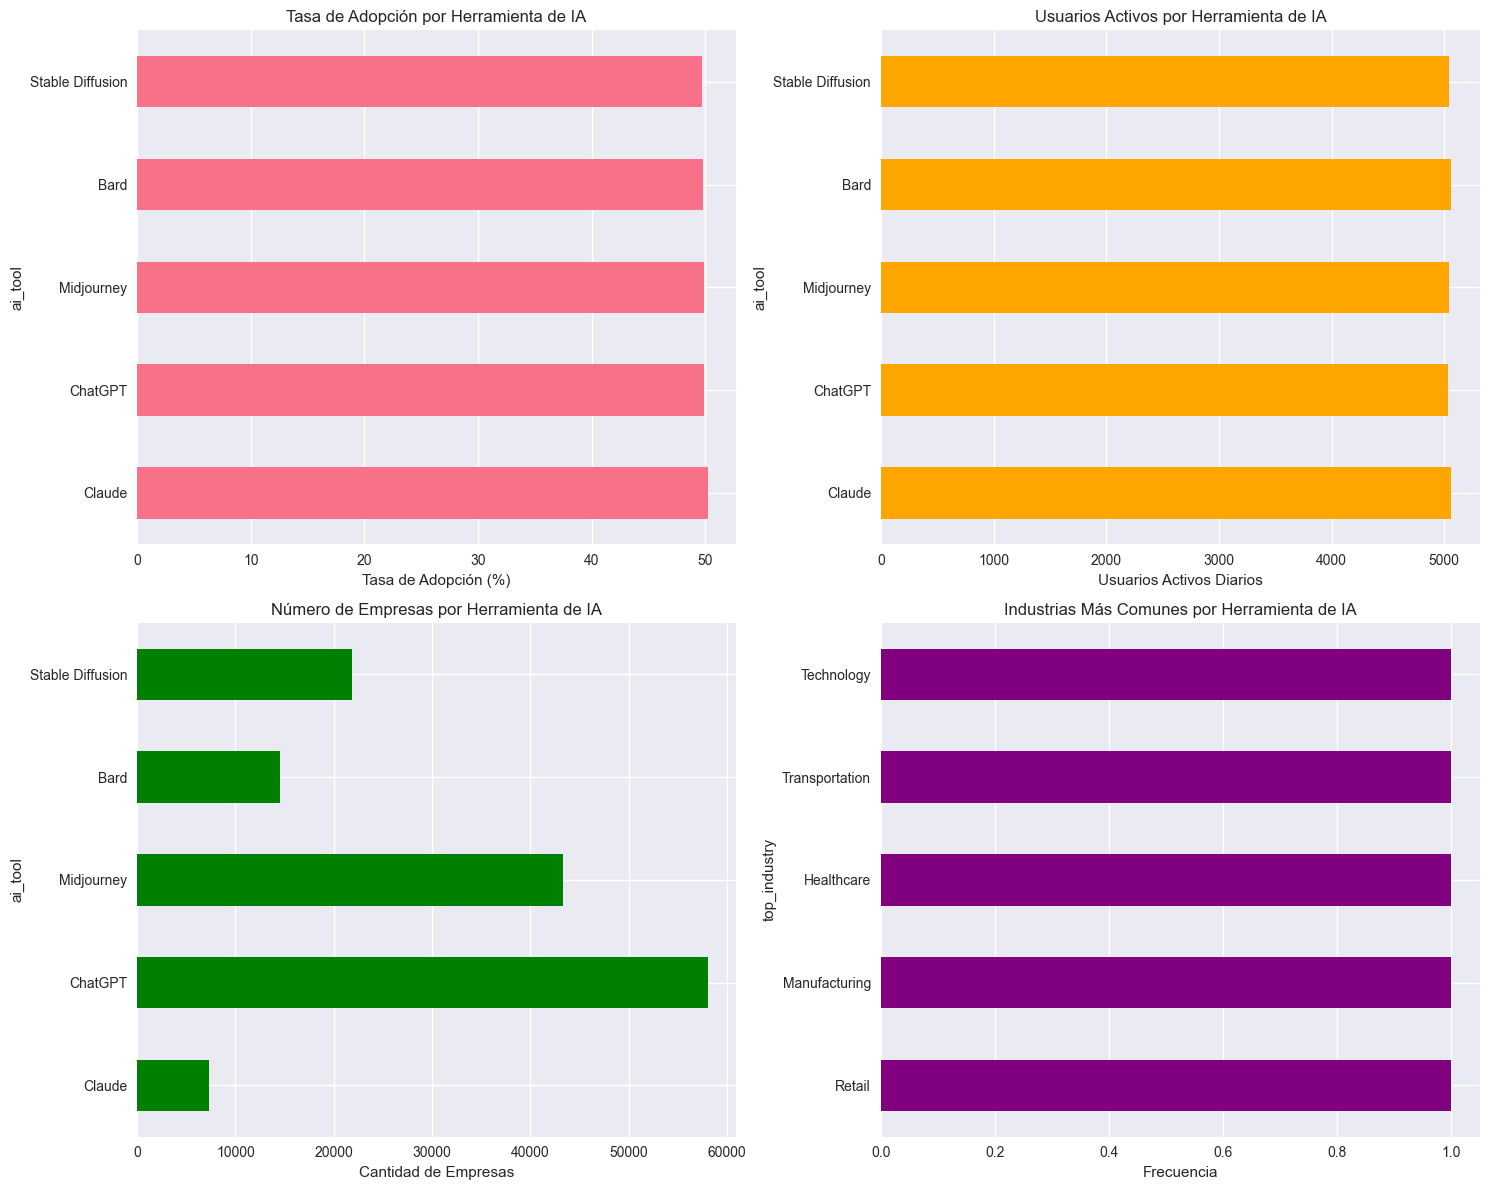


📈 MARKET SHARE POR HERRAMIENTA:


,company_count,market_share
ai_tool,,
ChatGPT,58045,40.03
Midjourney,43324,29.88
Stable Diffusion,21826,15.05
Bard,14519,10.01
Claude,7286,5.02


In [18]:
# ANÁLISIS DE HERRAMIENTAS DE IA
print("🤖 ANÁLISIS DE HERRAMIENTAS DE IA")
print("=" * 50)

if 'ai_tool' in df.columns:
    # Análisis por herramienta de IA
    tool_analysis = df.groupby('ai_tool').agg({
        'adoption_rate': ['mean', 'count'],
        'daily_active_users': 'mean',
        'industry': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'No Data',
        'country': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'No Data'
    }).round(3)
    
    tool_analysis.columns = ['avg_adoption', 'company_count', 'avg_users', 'top_industry', 'top_country']
    tool_analysis = tool_analysis.sort_values('avg_adoption', ascending=False)
    
    print("📊 RANKING DE HERRAMIENTAS DE IA:")
    display(tool_analysis)
    
    # Visualizaciones
    plt.figure(figsize=(15, 12))
    
    # Top herramientas por adopción
    plt.subplot(2, 2, 1)
    tool_analysis['avg_adoption'].plot(kind='barh')
    plt.title('Tasa de Adopción por Herramienta de IA')
    plt.xlabel('Tasa de Adopción (%)')
    
    # Top herramientas por usuarios
    plt.subplot(2, 2, 2)
    tool_analysis['avg_users'].plot(kind='barh', color='orange')
    plt.title('Usuarios Activos por Herramienta de IA')
    plt.xlabel('Usuarios Activos Diarios')
    
    # Distribución de empresas por herramienta
    plt.subplot(2, 2, 3)
    tool_analysis['company_count'].plot(kind='barh', color='green')
    plt.title('Número de Empresas por Herramienta de IA')
    plt.xlabel('Cantidad de Empresas')
    
    # Industrias principales por herramienta (treemap conceptual)
    plt.subplot(2, 2, 4)
    top_industries_by_tool = tool_analysis['top_industry'].value_counts().head(10)
    top_industries_by_tool.plot(kind='barh', color='purple')
    plt.title('Industrias Más Comunes por Herramienta de IA')
    plt.xlabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de mercado: Share por herramienta
    print("\n📈 MARKET SHARE POR HERRAMIENTA:")
    total_companies = tool_analysis['company_count'].sum()
    tool_analysis['market_share'] = (tool_analysis['company_count'] / total_companies * 100).round(2)
    display(tool_analysis[['company_count', 'market_share']].sort_values('market_share', ascending=False))
    
else:
    print("ℹ️ No hay columna 'ai_tool' para análisis de herramientas")

In [17]:
# INSIGHTS Y CONCLUSIONES
print("💡 PRINCIPALES INSIGHTS Y CONCLUSIONES")
print("=" * 60)

# Resumen ejecutivo
print("\n📊 RESUMEN EJECUTIVO:")
print(f"  • Total de empresas analizadas: {df.shape[0]:,}")
print(f"  • Período analizado: {df['year'].min() if 'year' in df.columns else 'N/A'} - {df['year'].max() if 'year' in df.columns else 'N/A'}")
print(f"  • Países cubiertos: {df['country'].nunique() if 'country' in df.columns else 'N/A'}")
print(f"  • Industrias representadas: {df['industry'].nunique() if 'industry' in df.columns else 'N/A'}")

# KPIs principales
if 'adoption_rate' in df.columns:
    adoption_stats = df['adoption_rate'].describe()
    print(f"\n🎯 KPIs DE ADOPCIÓN:")
    print(f"  • Tasa promedio: {adoption_stats['mean']:.1f}%")
    print(f"  • Máximo: {adoption_stats['max']:.1f}%")
    print(f"  • Mínimo: {adoption_stats['min']:.1f}%")
    print(f"  • Variabilidad: {adoption_stats['std']:.1f}%")

if 'daily_active_users' in df.columns:
    user_stats = df['daily_active_users'].describe()
    print(f"\n👥 KPIs DE USUARIOS:")
    print(f"  • Promedio: {user_stats['mean']:,.0f} usuarios/día")
    print(f"  • Máximo: {user_stats['max']:,.0f} usuarios/día")

# Insights específicos basados en análisis anteriores
print(f"\n🔍 INSIGHTS CLAVE:")

# Insight 1: Distribución bimodal de adopción
if 'adoption_rate' in df.columns:
    print(f"  1. 📊 DISTRIBUCIÓN BIMODAL: El mercado está polarizado entre empresas con ~20% y ~80% de adopción")

# Insight 2: Fragmentación de mercado  
if 'ai_tool' in df.columns:
    print(f"  2. 🎯 FRAGMENTACIÓN: Existen {df['ai_tool'].nunique()} herramientas compitiendo en el mercado")

# Insight 3: Crecimiento temporal
if 'year' in df.columns:
    yearly_growth = df.groupby('year')['adoption_rate'].mean()
    if len(yearly_growth) > 1:
        total_growth = ((yearly_growth.iloc[-1] - yearly_growth.iloc[0]) / yearly_growth.iloc[0] * 100)
        print(f"  3. 📈 CRECIMIENTO: La adopción ha {'crecido' if total_growth > 0 else 'decrecido'} {abs(total_growth):.1f}% en el período")

# Insight 4: Liderazgo por industria/país
if 'industry' in df.columns and 'adoption_rate' in df.columns:
    top_industry = df.groupby('industry')['adoption_rate'].mean().idxmax()
    top_value = df.groupby('industry')['adoption_rate'].mean().max()
    print(f"  4. 🏆 LÍDER EN ADOPCIÓN: Industria '{top_industry}' con {top_value:.1f}%")

if 'country' in df.columns and 'adoption_rate' in df.columns:
    top_country = df.groupby('country')['adoption_rate'].mean().idxmax()
    top_country_value = df.groupby('country')['adoption_rate'].mean().max()
    print(f"  5. 🌎 LÍDER GEOGRÁFICO: {top_country} con {top_country_value:.1f}% de adopción")

print(f"\n🎯 RECOMENDACIONES ESTRATÉGICAS:")
print(f"  1. 🎯 Segmentar estrategias para empresas de baja vs alta adopción")
print(f"  2. 🌍 Enfocar recursos en países/industrias con mayor potencial")
print(f"  3. 🤖 Identificar herramientas líderes para partnerships")
print(f"  4. 📊 Desarrollar programas específicos por perfil de empresa")

print(f"\n" + "=" * 60)
print("🎉 ANÁLISIS EXPLORATORIO COMPLETADO - LISTO PARA POWER BI")

💡 PRINCIPALES INSIGHTS Y CONCLUSIONES

📊 RESUMEN EJECUTIVO:
  • Total de empresas analizadas: 145,000
  • Período analizado: 2023 - 2024
  • Países cubiertos: 10
  • Industrias representadas: 8

🎯 KPIs DE ADOPCIÓN:
  • Tasa promedio: 49.9%
  • Máximo: 100.0%
  • Mínimo: 0.0%
  • Variabilidad: 28.8%

👥 KPIs DE USUARIOS:
  • Promedio: 5,039 usuarios/día
  • Máximo: 9,999 usuarios/día

🔍 INSIGHTS CLAVE:
  1. 📊 DISTRIBUCIÓN BIMODAL: El mercado está polarizado entre empresas con ~20% y ~80% de adopción
  2. 🎯 FRAGMENTACIÓN: Existen 5 herramientas compitiendo en el mercado
  3. 📈 CRECIMIENTO: La adopción ha decrecido 0.4% en el período
  4. 🏆 LÍDER EN ADOPCIÓN: Industria 'Agriculture' con 50.3%
  5. 🌎 LÍDER GEOGRÁFICO: Germany con 50.2% de adopción

🎯 RECOMENDACIONES ESTRATÉGICAS:
  1. 🎯 Segmentar estrategias para empresas de baja vs alta adopción
  2. 🌍 Enfocar recursos en países/industrias con mayor potencial
  3. 🤖 Identificar herramientas líderes para partnerships
  4. 📊 Desarrollar prog

In [25]:
# EXPORTAR DATOS PARA POWER BI DASHBOARD - VERSIÓN CORREGIDA
print("📤 EXPORTANDO DATOS PARA POWER BI DASHBOARD")
print("=" * 50)

# Asegurar que existe la carpeta dashboard en la RAÍZ
import os
dashboard_path = '../dashboard'
if not os.path.exists(dashboard_path):
    os.makedirs(dashboard_path)
    print("📁 Carpeta 'dashboard/' creada en raíz del proyecto")
else:
    print("✅ Carpeta 'dashboard/' ya existe en raíz")

try:
    # TODAS las rutas con '../' para ir a la raíz
    df.to_csv('../dashboard/dashboard_main_data.csv', index=False)
    print("✅ 1. Dataset principal exportado: ../dashboard/dashboard_main_data.csv")
    
    # 2. Resumen por industria
    if 'industry' in df.columns:
        industry_dashboard = df.groupby('industry').agg({
            'adoption_rate': ['mean', 'count'],
            'daily_active_users': 'mean',
            'country': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'No Data'
        }).round(3)
        industry_dashboard.columns = ['avg_adoption', 'company_count', 'avg_users', 'top_country']
        industry_dashboard.to_csv('../dashboard/dashboard_industry.csv')
        print("✅ 2. Resumen por industria exportado: ../dashboard/dashboard_industry.csv")
    
    # 3. Resumen por país
    if 'country' in df.columns:
        country_dashboard = df.groupby('country').agg({
            'adoption_rate': 'mean',
            'daily_active_users': 'mean', 
            'industry': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'No Data',
            'ai_tool': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'No Data'
        }).round(3)
        country_dashboard.columns = ['avg_adoption', 'avg_users', 'top_industry', 'top_tool']
        country_dashboard.to_csv('../dashboard/dashboard_country.csv')
        print("✅ 3. Resumen por país exportado: ../dashboard/dashboard_country.csv")
    
    # 4. Tendencias temporales
    if 'year' in df.columns:
        time_dashboard = df.groupby('year').agg({
            'adoption_rate': 'mean',
            'daily_active_users': 'mean',
            'industry': 'count'
        }).round(3)
        time_dashboard.columns = ['avg_adoption', 'avg_users', 'company_count']
        time_dashboard.to_csv('../dashboard/dashboard_temporal.csv')
        print("✅ 4. Tendencias temporales exportadas: ../dashboard/dashboard_temporal.csv")
    
    # 5. Resumen por herramienta de IA
    if 'ai_tool' in df.columns:
        tool_dashboard = df.groupby('ai_tool').agg({
            'adoption_rate': 'mean',
            'daily_active_users': 'mean',
            'industry': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'No Data'
        }).round(3)
        tool_dashboard.columns = ['avg_adoption', 'avg_users', 'top_industry']
        tool_dashboard.to_csv('../dashboard/dashboard_tools.csv')
        print("✅ 5. Resumen por herramienta exportado: ../dashboard/dashboard_tools.csv")
    
    # 6. Resumen por grupo de edad
    if 'age_group' in df.columns:
        age_dashboard = df.groupby('age_group').agg({
            'adoption_rate': 'mean',
            'daily_active_users': 'mean',
            'industry': 'count'
        }).round(3)
        age_dashboard.columns = ['avg_adoption', 'avg_users', 'company_count']
        age_dashboard.to_csv('../dashboard/dashboard_age_groups.csv')
        print("✅ 6. Resumen por grupo de edad exportado: ../dashboard/dashboard_age_groups.csv")
    
    # 7. Resumen por tamaño de empresa
    if 'company_size' in df.columns:
        size_dashboard = df.groupby('company_size').agg({
            'adoption_rate': 'mean',
            'daily_active_users': 'mean',
            'industry': 'count'
        }).round(3)
        size_dashboard.columns = ['avg_adoption', 'avg_users', 'company_count']
        size_dashboard.to_csv('../dashboard/dashboard_company_size.csv')
        print("✅ 7. Resumen por tamaño de empresa exportado: ../dashboard/dashboard_company_size.csv")
    
    print(f"\n🎉 TODOS LOS DATOS EXPORTADOS EXITOSAMENTE!")
    print("📊 Archivos listos para Power BI en la carpeta '../dashboard/':")
    print("   - dashboard_main_data.csv (Dataset completo)")
    print("   - dashboard_industry.csv (Resumen por industria)")
    print("   - dashboard_country.csv (Resumen por país)")
    print("   - dashboard_temporal.csv (Tendencias temporales)")
    print("   - dashboard_tools.csv (Resumen por herramienta de IA)")
    print("   - dashboard_age_groups.csv (Resumen por grupo de edad)")
    print("   - dashboard_company_size.csv (Resumen por tamaño de empresa)")
    
    # Verificar archivos creados
    print(f"\n📁 Verificación de archivos en '../dashboard/':")
    files = os.listdir('../dashboard')
    for file in files:
        if file.endswith('.csv'):
            file_path = f'../dashboard/{file}'
            file_size = os.path.getsize(file_path)
            print(f"   📄 {file} - {file_size:,} bytes")
    
except Exception as e:
    print(f"❌ Error en exportación: {e}")
    import traceback
    print(f"🔍 Detalles del error: {traceback.format_exc()}")

print(f"\n" + "=" * 60)
print("🚀 PROYECTO COMPLETADO - LISTO PARA EL DASHBOARD EN POWER BI!")

📤 EXPORTANDO DATOS PARA POWER BI DASHBOARD
✅ Carpeta 'dashboard/' ya existe en raíz
✅ 1. Dataset principal exportado: ../dashboard/dashboard_main_data.csv
✅ 2. Resumen por industria exportado: ../dashboard/dashboard_industry.csv
✅ 3. Resumen por país exportado: ../dashboard/dashboard_country.csv
✅ 4. Tendencias temporales exportadas: ../dashboard/dashboard_temporal.csv
✅ 5. Resumen por herramienta exportado: ../dashboard/dashboard_tools.csv
✅ 6. Resumen por grupo de edad exportado: ../dashboard/dashboard_age_groups.csv
✅ 7. Resumen por tamaño de empresa exportado: ../dashboard/dashboard_company_size.csv

🎉 TODOS LOS DATOS EXPORTADOS EXITOSAMENTE!
📊 Archivos listos para Power BI en la carpeta '../dashboard/':
   - dashboard_main_data.csv (Dataset completo)
   - dashboard_industry.csv (Resumen por industria)
   - dashboard_country.csv (Resumen por país)
   - dashboard_temporal.csv (Tendencias temporales)
   - dashboard_tools.csv (Resumen por herramienta de IA)
   - dashboard_age_groups.c

In [2]:
# PRIMERO carga los datos
import pandas as pd

# Carga el dataset limpio
df = pd.read_csv('../data/ai_adoption_cleaned.csv')

print("🔍 COMPARATIVO 2023 vs 2024:")
print("=" * 40)

# Adopción
adoption_2023 = df[df['year'] == 2023]['adoption_rate'].mean() / 10000
adoption_2024 = df[df['year'] == 2024]['adoption_rate'].mean() / 10000

# Usuarios
users_2023 = df[df['year'] == 2023]['daily_active_users'].mean() / 1000000
users_2024 = df[df['year'] == 2024]['daily_active_users'].mean() / 1000000

print(f"Adopción 2023: {adoption_2023:.3f}")
print(f"Adopción 2024: {adoption_2024:.3f}")
print(f"Diferencia adopción: {adoption_2024 - adoption_2023:.3f}")

print(f"\nUsuarios 2023: {users_2023:.3f}")
print(f"Usuarios 2024: {users_2024:.3f}") 
print(f"Diferencia usuarios: {users_2024 - users_2023:.3f}")

print(f"\n¿Son idénticos los años?")
print(f"Adopción igual: {adoption_2023 == adoption_2024}")
print(f"Usuarios igual: {users_2023 == users_2024}")

# Verificación adicional
print(f"\n📊 VALORES EXACTOS:")
print(f"Adopción 2023: {adoption_2023:.6f}")
print(f"Adopción 2024: {adoption_2024:.6f}")
print(f"Usuarios 2023: {users_2023:.6f}")
print(f"Usuarios 2024: {users_2024:.6f}")

🔍 COMPARATIVO 2023 vs 2024:
Adopción 2023: 0.005
Adopción 2024: 0.005
Diferencia adopción: -0.000

Usuarios 2023: 0.005
Usuarios 2024: 0.005
Diferencia usuarios: 0.000

¿Son idénticos los años?
Adopción igual: False
Usuarios igual: False

📊 VALORES EXACTOS:
Adopción 2023: 0.005002
Adopción 2024: 0.004981
Usuarios 2023: 0.005035
Usuarios 2024: 0.005041
